# Final Notebook - Preprocessing, NLP, and Modeling

## Introduction

### Importing Relevent Modules

###### Import NLP/Standard Packages

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy 
import re
from gensim.models.phrases import Phraser, Phrases
import pickle

###### Import Scraped Combined Data 

In [4]:
df = pd.read_csv("Redfin Data\Redfin_Combined.csv")

###### Dropping Properties Where Webscraping Failed

In [5]:
df = df[df["Description"] != "Skipped after 4 retries"]

In [6]:
df = df[df["Description"] != "NA"]

In [7]:
df.dropna(subset=["Description"], inplace=True)

######  Checking Columns

In [8]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE',
       'INTERESTED', 'LATITUDE', 'LONGITUDE', 'Description'],
      dtype='object')

In [9]:
df

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,Description
0,PAST SALE,May-30-2023,Single Family Residential,9238 Evanston Ave N,Seattle,WA,98103.0,690000.0,2.0,1.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/9238-Evansto...,NWMLS as Distributed by MLS Grid,2065664.0,N,Y,47.697164,-122.351014,INVESTORS & homebuyers- Check out this FULLY u...
1,PAST SALE,September-22-2023,Single Family Residential,1412 N 46th St,Seattle,WA,98103.0,900000.0,2.0,1.5,...,NaN,NaN,https://www.redfin.com/WA/Seattle/1412-N-46th-...,NWMLS as Distributed by MLS Grid,2150815.0,N,Y,47.662339,-122.339990,"Charming & undeniably special, you'll fall in ..."
2,PAST SALE,October-27-2023,Condo/Co-op,731 N 94th St #4,Seattle,WA,98103.0,410000.0,2.0,2.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/731-N-94th-S...,NWMLS as Distributed by MLS Grid,2167654.0,N,Y,47.696649,-122.348650,"Welcome home to this move-in ready, recently u..."
3,PAST SALE,July-20-2023,Condo/Co-op,6801 Greenwood Ave N #105,Seattle,WA,98103.0,515000.0,1.0,1.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/6801-Greenwo...,NWMLS as Distributed by MLS Grid,2127918.0,N,Y,47.678871,-122.355649,Rare opportunity for a bright & airy condo w/ ...
4,PAST SALE,May-26-2023,Condo/Co-op,8760 Greenwood Ave N Unit N405,Seattle,WA,98103.0,398500.0,1.0,1.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/8760-Greenwo...,NWMLS as Distributed by MLS Grid,2062567.0,N,Y,47.694002,-122.355046,"Light, bright, & centrally located - this beau..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,PAST SALE,November-9-2022,Condo/Co-op,14029 Greenwood Ave N Unit B,Seattle,WA,98133.0,430000.0,2.0,2.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/14029-Greenw...,NWMLS as Distributed by MLS Grid,1990579.0,N,Y,47.731340,-122.356059,Seller offering $8K credit to buyer for intere...
7057,PAST SALE,April-20-2023,Townhouse,10170 Holman Rd NW Unit C,Seattle,WA,98177.0,622500.0,2.0,2.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/10170-Holman...,NWMLS as Distributed by MLS Grid,2038206.0,N,Y,47.703461,-122.358204,New Pricing! Stunning new construction in Crow...
7058,PAST SALE,May-4-2023,Townhouse,14302 Midvale Ave N,Seattle,WA,98133.0,550000.0,2.0,2.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/14302-Midval...,NWMLS as Distributed by MLS Grid,2042405.0,N,Y,47.732467,-122.343786,Great value for home buyers or investors! 2 b...
7059,PAST SALE,December-6-2022,Single Family Residential,727 N 128th St,Seattle,WA,98117.0,755000.0,2.0,2.0,...,NaN,NaN,https://www.redfin.com/WA/Seattle/727-N-128th-...,NWMLS as Distributed by MLS Grid,2005454.0,N,Y,47.722070,-122.349220,Stand-alone new construction with heated 400 S...


###### Lowercasing all Descriptions

In [10]:
df ["Description"] = df["Description"].str.lower()

###### Checking to ensure Descriptions are lowercased correctly

In [11]:
df["Description"].head()

0    investors & homebuyers- check out this fully u...
1    charming & undeniably special, you'll fall in ...
2    welcome home to this move-in ready, recently u...
3    rare opportunity for a bright & airy condo w/ ...
4    light, bright, & centrally located - this beau...
Name: Description, dtype: object

###### Lemmatizing 

In [12]:
nlp = spacy.load('en_core_web_sm')
#Lemmitization Function
def lemmatize(text): 
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

###### Applying the Lemmitization Function

In [13]:
df["Description"] = df["Description"].apply(lemmatize)

###### Looking at the Text Content after Lemmatization

In [14]:
df["Description"].head()

0    investor & homebuyers- check out this fully up...
1    charming & undeniably special , you 'll fall i...
2    welcome home to this move - in ready , recentl...
3    rare opportunity for a bright & airy condo w/ ...
4    light , bright , & centrally locate - this bea...
Name: Description, dtype: object

###### Removing Stop Words

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
df["Description"] = df["Description"].apply(word_tokenize)

In [17]:
clean_words = []
for tokenized_description in df["Description"]:
    cleaned_tokens = [token for token in tokenized_description if token not in stop_words]
    clean_words.append(cleaned_tokens)

In [18]:
df["Description"] = clean_words

###### Cleaning Tokens (Removing Special Characters) 

In [19]:
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        cleaned_token = re.sub(r'[^a-zA-Z0-9]', '', token)
        if cleaned_token:
            cleaned_tokens.append(cleaned_token)
    return cleaned_tokens

###### Applying the Clean Functions

In [22]:
df["Description"] = df["Description"].apply(clean_tokens)

###### Creating a Gensim Bigram Model

In [23]:
phrases = Phrases(df["Description"], min_count=1, threshold=1)
bigram = Phraser(phrases)

In [24]:
with open('bigram_model.pkl', 'wb') as f:
    pickle.dump(bigram, f)

###### Applying "Probable" Bigram Model to df["Description"]

In [25]:
df['Description'] = df['Description'].apply(lambda tokens: ' '.join(bigram[tokens]))

###### Intializing the CountVectorizer (BOW)

In [26]:
vectorizer = CountVectorizer(stop_words=["show_less"], max_df = .95, min_df = .01)

In [27]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

###### Fitting the CountVectorizer(BOW); Setting Max_DF relatively low because common words not likely to be instructive for prediction

In [28]:
vectorizer.fit(df["Description"])

CountVectorizer(max_df=0.95, min_df=0.01, stop_words=['show_less'])

###### Transforming

In [29]:
transformed_df = vectorizer.transform(df["Description"])

###### Rejoining the Dataframe

In [30]:
df_bow = pd.DataFrame(transformed_df.toarray(), columns=vectorizer.get_feature_names_out())

In [31]:
word_counts = df_bow.sum()

###### Reseting Indexes to Prepare to Recombine

In [32]:
df.reset_index(drop=True, inplace=True)
df_bow.reset_index(drop=True, inplace=True)

###### Combining the DF's

In [33]:
df_combined = pd.concat([df.drop('Description', axis=1), df_bow], axis=1)

###### Dropping Irrelevent Features

In [34]:
df_combined.drop(["INTERESTED","FAVORITE","SOURCE","URL", "HOA/MONTH","DAYS ON MARKET","NEXT OPEN HOUSE START TIME", "NEXT OPEN HOUSE END TIME"], axis=1 , inplace = True)

In [35]:
df_combined.iloc[:,:19].isna().sum()

SALE TYPE                0
SOLD DATE              225
PROPERTY TYPE            0
ADDRESS                  0
CITY                     0
STATE OR PROVINCE        0
ZIP OR POSTAL CODE       0
PRICE                    0
BEDS                    12
BATHS                   12
LOCATION               225
SQUARE FEET              8
LOT SIZE              1198
YEAR BUILT              14
$/SQUARE FEET            9
STATUS                 225
MLS#                   225
LATITUDE                 0
LONGITUDE                0
dtype: int64

###### Filtering Out Multifamily Properties

In [36]:
property_types = ["Single Family Residential", "Condo/Co-op", "Townhouse"]
df_filtered = df_combined[df_combined["PROPERTY TYPE"].isin(property_types)]

### NLP Preprocessing is Complete

###### Imputing Lotsizes 

In [37]:
#FOR SFH we're imputing based on the mean lot size to square footage ratio. Otherwise, we can assume lot size and square footage are roughly equal in attached product.
sfh_average_ratio = df_filtered[df_filtered['PROPERTY TYPE'] == 'Single Family Residential']['SQUARE FEET'].mean() / df_filtered[df_filtered['PROPERTY TYPE'] == 'Single Family Residential']['LOT SIZE'].mean()

for index, row in df_filtered.iterrows():
    if pd.isna(row['LOT SIZE']):
        if row['PROPERTY TYPE'] in ['Condo/Co-op', 'Townhouse']:
            df_filtered.at[index, 'LOT SIZE'] = row['SQUARE FEET']
        elif row['PROPERTY TYPE'] == 'Single Family Residential' and not pd.isna(row['SQUARE FEET']):
            imputed_lot_size = row['SQUARE FEET'] / sfh_average_ratio
            df_filtered.at[index, 'LOT SIZE'] = imputed_lot_size


missing_lot_size_count = df_filtered['LOT SIZE'].isna().sum()
print(f"Missing 'LOT SIZE' values after imputation: {missing_lot_size_count}")


Missing 'LOT SIZE' values after imputation: 1


###### Dropping any NA's in the BATHS Column

In [38]:
df_filtered = df_filtered.dropna(subset=["BATHS"])

In [39]:
df_filtered.iloc[:, :20].isna().sum()

SALE TYPE               0
SOLD DATE             218
PROPERTY TYPE           0
ADDRESS                 0
CITY                    0
STATE OR PROVINCE       0
ZIP OR POSTAL CODE      0
PRICE                   0
BEDS                    5
BATHS                   0
LOCATION              218
SQUARE FEET             1
LOT SIZE                1
YEAR BUILT              7
$/SQUARE FEET           2
STATUS                218
MLS#                  218
LATITUDE                0
LONGITUDE               0
12_bath                 0
dtype: int64

###### Dropping BOW that include digits

In [40]:
columns_to_drop = [col for col in df_filtered.columns if col.isdigit()]
df_filtered = df_filtered.drop(columns=columns_to_drop)


###### Dropping $/Square Feet because it will provide info on the target variable

In [41]:
df_preprocessed = df_filtered.drop(["$/SQUARE FEET"], axis=1)

###### Filtering to ensure all entries are from the City of Seattle

In [42]:
df_preprocessed = df_preprocessed[df_preprocessed["CITY"] == "Seattle"]

###### Dropping Other Irrelevent Columns

In [43]:
df_preprocessed.drop(["STATE OR PROVINCE", "MLS#", "LONGITUDE", "LATITUDE", "STATUS","ADDRESS","CITY"], axis=1, inplace=True)

###### Filtering out obscure Locations/Gated Communities

In [44]:

value_counts = df_preprocessed['LOCATION'].value_counts()

categories_to_keep = value_counts[value_counts > 6].index

df_preprocessed = df_preprocessed[df_preprocessed['LOCATION'].isin(categories_to_keep)]


###### Creating A Quarter and Year Column

In [45]:
df_preprocessed['SOLD DATE'] = pd.to_datetime(df_preprocessed['SOLD DATE'], format='%B-%d-%Y')

df_preprocessed['Quarter'] = df_preprocessed['SOLD DATE'].dt.quarter
df_preprocessed['Year'] = df_preprocessed['SOLD DATE'].dt.year

###### Substituting the Age of the Property instead of Year Built

In [46]:
df_preprocessed['Age'] = 2023 - df_preprocessed["YEAR BUILT"]

###### Reinsating the new columns at the beginning of the Data Frame

In [47]:
columns = list(df_preprocessed.columns)
columns.remove('Quarter')
columns.remove('Year')
columns.remove('Age')
df_preprocessed = df_preprocessed[['Quarter', 'Year', 'Age'] + columns]

###### Dropping Year Built

In [48]:
df_preprocessed.drop("YEAR BUILT", axis=1, inplace=True)
df_preprocessed.reset_index(drop=True, inplace=True)

## Time to Machine Learn

In [314]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

In [249]:
df_preprocessed["PRICE"].max()

16200000.0

In [379]:
df_preprocessed.iloc[:,:13]

,Quarter,Year,Age,SALE TYPE,SOLD DATE,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE
0,2,2023,83.0,PAST SALE,2023-05-30,Single Family Residential,98103.0,690000.0,2.0,1.0,Greenwood,730.0,5663.0
1,3,2023,99.0,PAST SALE,2023-09-22,Single Family Residential,98103.0,900000.0,2.0,1.5,Wallingford,1860.0,3333.0
2,4,2023,36.0,PAST SALE,2023-10-27,Condo/Co-op,98103.0,410000.0,2.0,2.0,Greenwood,843.0,843.0
3,3,2023,16.0,PAST SALE,2023-07-20,Condo/Co-op,98103.0,515000.0,1.0,1.0,Phinney Ridge,737.0,737.0
4,2,2023,25.0,PAST SALE,2023-05-26,Condo/Co-op,98103.0,398500.0,1.0,1.0,Greenwood,832.0,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,4,2022,28.0,PAST SALE,2022-11-09,Condo/Co-op,98133.0,430000.0,2.0,2.0,Greenwood,903.0,903.0
5164,2,2023,0.0,PAST SALE,2023-04-20,Townhouse,98177.0,622500.0,2.0,2.0,Crown Hill,1320.0,946.0
5165,2,2023,6.0,PAST SALE,2023-05-04,Townhouse,98133.0,550000.0,2.0,2.0,Haller Lake,1160.0,703.0
5166,4,2022,1.0,PAST SALE,2022-12-06,Single Family Residential,98117.0,755000.0,2.0,2.0,Bitter Lake,1288.0,5365.0


0       98103.0
1       98103.0
2       98103.0
3       98103.0
4       98103.0
         ...   
6303    98133.0
6304    98177.0
6305    98133.0
6306    98117.0
6307    98133.0
Name: ZIP OR POSTAL CODE, Length: 6308, dtype: float64

###### Filtering Out Large Outliers

In [2]:
df_preprocessed['Z_Price'] = np.abs((df_preprocessed['PRICE'] - df_preprocessed['PRICE'].mean()) / df_preprocessed['PRICE'].std())
df_preprocessed['Z_LotSize'] = np.abs((df_preprocessed['LOT SIZE'] - df_preprocessed['LOT SIZE'].mean()) / df_preprocessed['LOT SIZE'].std())
df_preprocessed = df_preprocessed[(df_preprocessed['Z_Price'] < 7) & (df_preprocessed['Z_LotSize'] < 4)]
df_preprocessed = df_preprocessed.drop(columns=['Z_Price', 'Z_LotSize'])

NameError: name 'np' is not defined

###### Looking at Final Dataset Stats Before Split

In [253]:
df_preprocessed.describe()

,Quarter,Year,Age,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,...,window,wonderful,wood_burn,wood_floor,work,work_home,yard,year,year_round,yet
count,5137.000000,5137.000000,5137.000000,5137,5137.000000,5.137000e+03,5137.000000,5137.000000,5137.000000,5137.000000,...,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000
mean,2.495815,2022.859256,48.726494,2023-05-12 19:40:25.462332160,98118.723185,9.583315e+05,2.805529,2.115632,1729.580300,4039.244255,...,0.097138,0.030368,0.036792,0.011875,0.024139,0.014211,0.071637,0.017131,0.027643,0.009539
min,1.000000,2022.000000,-2.000000,2022-10-31 00:00:00,98012.000000,2.025000e+05,0.000000,0.500000,268.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2023.000000,7.000000,2023-02-28 00:00:00,98105.000000,6.250000e+05,2.000000,1.500000,1097.000000,1093.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2023.000000,44.000000,2023-05-19 00:00:00,98112.000000,8.200000e+05,3.000000,2.000000,1568.000000,3330.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2023.000000,82.000000,2023-08-02 00:00:00,98117.000000,1.149000e+06,3.000000,2.500000,2213.000000,5580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2023.000000,133.000000,2023-10-31 00:00:00,98199.000000,4.764000e+06,8.000000,7.500000,9600.000000,47354.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
std,1.049603,0.347791,39.954927,NaN,22.511534,5.418514e+05,1.130738,0.829663,855.035205,4236.172292,...,0.302678,0.174985,0.190326,0.111869,0.159711,0.120003,0.268272,0.131263,0.165146,0.099191


In [50]:
df_preprocessed.to_csv("Redfin Data/df_preprocessed.csv", index=False)

###### Splitting Price (Target) from rest of DataFrame

In [254]:
X = df_preprocessed.drop("PRICE", axis=1)
y = df_preprocessed["PRICE"]

###### Filtering 1st 12 columns (Non-BOW columns) to pass through transformers

In [255]:
first_12_columns = X.iloc[:, :12]
numeric_cols = first_12_columns.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = first_12_columns.select_dtypes(include=['object']).columns

###### Creating the Transformers for each dtype

In [256]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()), 
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop = "first"))
])


###### BOW's doesn't need to be transformed 

In [257]:
bow_cols = X.columns[12:]

###### Creating Preprocessor

In [258]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('bow', 'passthrough', bow_cols)
    ]
)

###### Test Train Split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Intiating 1st Simple Baseline Model: Decision Tree Classifier (No Tuning)

In [260]:
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("classifier", DecisionTreeRegressor())
])


###### Fitting the Pipeline

In [261]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET',
       'LOT SIZE'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['SALE TYPE', 'PROPERTY TYPE', 'LOCATION'], dtype='object')),
                                                 ('bow', 'passthrough',
                                                  Index(['12_bath', '175_bath', '1_bath', '1_bedroom', '1_car', '2_bath',
       '2_bed', '2_bedroom', '2_car', '2nd_floor',
       ...
       'window', 'wonderful', 'wood_burn', 'wood_floor', 'work', 'work_home',
       'yard', 'year', 'year_round', 'yet'],
      dtype='object', length=663))])),
                ('classifier', DecisionTreeRegressor())])

###### Predicting on the Test 

In [262]:
y_pred1 = pipeline1.predict(X_test)

###### Evaluating Performance

In [263]:

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
r21 = r2_score(y_test, y_pred1)

print(f"Mean Absolute Error: {mae1}")
print(f"Mean Squared Error: {mse1}")
print(f"r2: {r21}")

Mean Absolute Error: 178579.3385214008
Mean Squared Error: 97465759371.27043
r2: 0.6767781066762495


###### Getting Mean Absolute Error Percentage

In [264]:
y_testnp, y_prednp = np.array(y_test), np.array(y_pred1)

In [265]:
mape = np.mean(np.abs((y_testnp - y_prednp) / y_testnp)) * 100

In [266]:
print(f"Mean Absolute Percentage Error%: {mape}")

Mean Absolute Percentage Error%: 17.938636655509303


###### Getting Median Absolute Percentage Error

In [291]:
absolute_percentage_errors2 = np.abs((y_test - y_pred1) / y_test) * 100

In [292]:
median_percentage_error2 = np.median(absolute_percentage_errors2)

In [294]:
print(f"Median Absolute Percentage Error: {median_percentage_error2:.2f}%")

Median Absolute Percentage Error: 11.70%


###### Model Prediction Values vs. Ground Truth Values

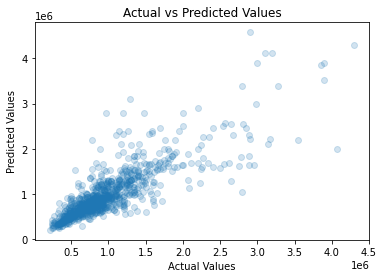

In [267]:
plt.scatter(y_test, y_pred1, alpha=0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()

###### Residual Values

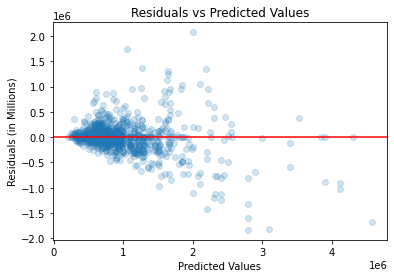

In [268]:
residuals = y_test - y_pred1
plt.scatter(y_pred1, residuals, alpha =0.2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (in Millions)")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


###### Model Evaluation

- The Model is relatively accurate among the lower price points under the 1mm price point
- The Model displays a tendency to underestimate prices above the 3 million dollar point 
- The Model is off by a mean of 18.5%, which is a pretty substantial sum


#### Model #2 Random Forest Regressor (With Hyperparameter Tuning)

In [283]:


pipeline2 = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(bootstrap=True, random_state =42))  
])


param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=pipeline2, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose = 10)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


In [284]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"r2: {r2}")

Mean Absolute Error: 139479.18241245483
Mean Squared Error: 55794246230.9817
r2: 0.8149717190972277


###### Getting Mean Absolute Percentage Error

In [285]:
y_testnp1, y_prednp1 = np.array(y_test), np.array(y_pred)

In [286]:
mape2 = np.mean(np.abs((y_testnp1 - y_prednp1) / y_testnp1)) * 100

###### Mean Absolute Percentage Error

In [287]:
print(f"Mean Absolute Percentage Error: {mape2:.2f}%")

Mean Absolute Percentage Error: 14.46%


##### Getting Median Absolute Percentage Error

In [288]:
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test) * 100

In [289]:
median_percentage_error = np.median(absolute_percentage_errors)

In [290]:
print(f"Median Absolute Percentage Error: {median_percentage_error:.2f}%")

Median Absolute Percentage Error: 9.18%


###### Model Prediction Values vs. Ground Truth Values

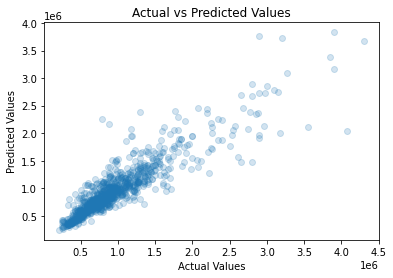

In [304]:
plt.scatter(y_test, y_pred, alpha =0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()

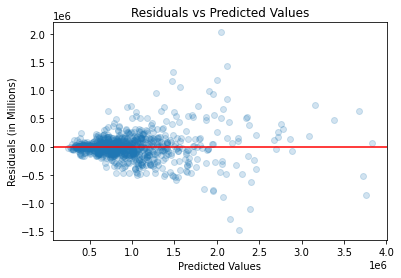

In [305]:
residual2 = y_test - y_pred
plt.scatter(y_pred, residual2, alpha=0.2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (in Millions)")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


###### Model Evaluation

- This random forest regressor model is much more accurate; it's mean error is 40k less than the basic decision tree regressor 
- It again displays relatively good accuracy below the 1.5 mm price point, although some of this is just a result of the higher absolute price point
- The model predicts prices with a mean-error of approximately 14.5% which is a large improvement from the simple model 
- The model predices prices with a median error of approximately 9.2% which is a somewhat more modest improvement from the simple model

#### Model #3 XGBoost Regressor (Hyperparameter Tuned)

In [269]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline3 = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(random_state=42)) 
])
param_grid = {
    'regressor__n_estimators': [300, 500],
    'regressor__max_depth': [10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__min_child_weight': [1, 2, 4],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]

}
grid_search1 = GridSearchCV(estimator=pipeline3,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error', 
                           n_jobs=-1,
                           verbose=10)
grid_search1.fit(X_train, y_train)
best_params1 = grid_search1.best_params_
best_model1 = grid_search1.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [270]:
y_pred2 = best_model1.predict(X_test)

In [271]:
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r22= r2_score(y_test, y_pred2)

print(f"Mean Absolute Error: {mae2}")
print(f"Mean Squared Error: {mse2}")
print(f"r2: {r22}")

Mean Absolute Error: 119013.16447288424
Mean Squared Error: 39570895633.98357
r2: 0.8687725834196618


In [272]:
y_testnp2, y_prednp2 = np.array(y_test), np.array(y_pred2)

In [273]:
mape3 = np.mean(np.abs((y_testnp2 - y_prednp2) / y_testnp2)) * 100

In [274]:
print(f"Mean Absolute Percentage Error%: {mape3:.2f}%")

Mean Absolute Percentage Error%: 12.64%


###### Getting Median Absolute Error Percentages

In [275]:
absolute_percentage_errors2 = np.abs((y_test - y_pred2) / y_test) * 100

In [276]:
median_percentage_error2 = np.median(absolute_percentage_errors2)

###### Median Absolute Percentage Error 

In [277]:
print(f"Median Absolute Percentage Error: {median_percentage_error2:.2f}%")

Median Absolute Percentage Error: 8.19%


###### Model Prediction Values vs. Ground Truth Values

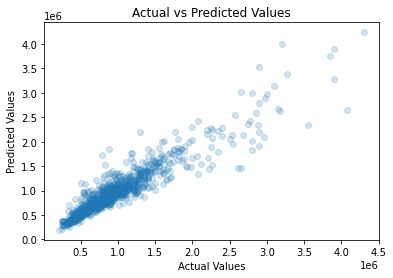

In [278]:
plt.scatter(y_test, y_pred2, alpha=0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()

###### Residuals

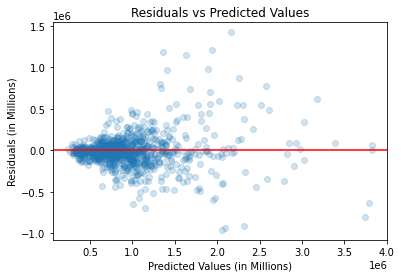

In [279]:
residual3 = y_test - y_pred2
plt.scatter(y_pred, residual3, alpha=0.2)
plt.xlabel("Predicted Values (in Millions)")
plt.ylabel("Residuals (in Millions)")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


###### Feature Importances

###### Extracting Model from Pipeline

In [280]:
best_model_model1 = best_model1.named_steps["regressor"]
importances = best_model_model1.feature_importances_

###### Creating Sorted Importances for Visualization

In [281]:
feature_names = X_train.columns
feature_importances = dict(zip(feature_names, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

###### Visualizing Top 30 Features

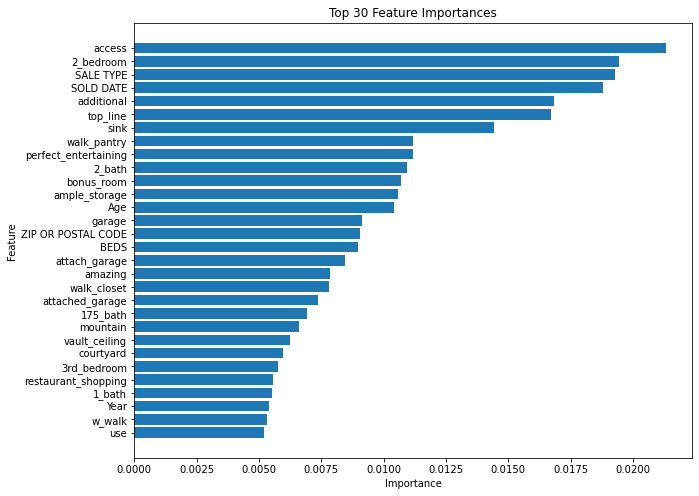

In [365]:
features, scores = zip(*sorted_importances)
plt.figure(figsize=(10, 8))
plt.barh(features[0:30], scores[0:30])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances')
plt.gca().invert_yaxis() 
plt.show()


###### Model Evaluation

- This XGBoost Regressor Model represents a substantial upgrade over the last 2 models with a mean absolute error of 119k
- This XGBoost Model shows the same error tendencies as the above random forest model with much more consistently 
  accurate predictions under $1mm
- The model has a mean absolute error percentage of just 12.64%, representing a modest improvement from the Random Forest Regressor  
- The model has a median absolute error percentage of just 8.2%, representing a modest improvement from the Random Forest Regressor

###### Feature Importance Discussion

- Relevent Home Features: 
    - Walk-in-Pantry
    - Bonus Room 
    - Storage
    - Attached Garage
    - Mountains
    - Vaulted Ceilings
    - Adjacent to Restaurants & Shopping
    - Courtyard
- Most Relevent Home Variables
    - Bedrooms
    - Sale Type
    - Sold Date
    - Zipcode/Postal Code
    - Beds 
    - Year of Sale
    
- Conclusion: 
    - The utility of XGBoost feature importances is limited insofar as there is limited intepretability to how each feature specifically contributes to the target price variable. Certainly, we understand they are important to the prediction. However, it's less clear how they impact the target price variable. Therefore, these are important features but they must be contextualized with domain knowledge to provide real value

###### Model #4 SVR Regressor (Hyperparameter Tuned)

In [315]:
pipeline4 = Pipeline([
    ('preprocessing', preprocessor),
    ('svr', SVR())
])

param_grid4 = {
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.5, 1, 2],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search3 = GridSearchCV(estimator=pipeline4,
                           param_grid=param_grid4,
                           cv=5,  
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,  
                           verbose=10)

grid_search3.fit(X_train, y_train)

best_params2 = grid_search3.best_params_
best_model2 = grid_search3.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
Best Hyperparameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


In [368]:
print(best_params2)

{'svr__C': 1000, 'svr__epsilon': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}


In [316]:
y_pred5 = best_model2.predict(X_test)

In [317]:
mae9 = mean_absolute_error(y_test, y_pred5)
mse9 = mean_squared_error(y_test, y_pred5)
r29 = r2_score(y_test, y_pred5)

print(f"Mean Absolute Error: {mae9}")
print(f"Mean Squared Error: {mse9}")
print(f"r2: {r29}")

Mean Absolute Error: 175489.8944100629
Mean Squared Error: 93114765332.25554
r2: 0.6912071383711001


###### Getting Mean Absolute Percentage Error

In [318]:
y_testnp3, y_prednp3 = np.array(y_test), np.array(y_pred5)

In [319]:
mape3 = np.mean(np.abs((y_testnp3 - y_prednp3) / y_testnp3)) * 100

In [320]:
print(f"Mean Absolute Percentage Error%: {mape3:.2f}%")

Mean Absolute Percentage Error%: 17.30%


###### Getting Median Absolute Percentage Error 

In [323]:
absolute_percentage_errors3 = np.abs((y_test - y_pred5) / y_test) * 100

In [324]:
median_percentage_error3 = np.median(absolute_percentage_errors2)

In [325]:
print(f"Median Absolute Percentage Error: {median_percentage_error3:.2f}%")

Median Absolute Percentage Error: 12.71%


###### Model Prediction Values vs. Ground Truth Values

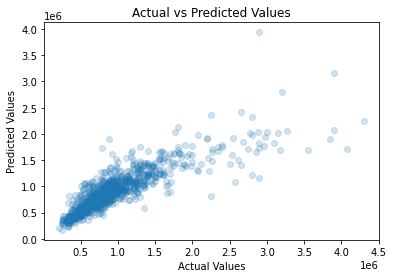

In [361]:
plt.scatter(y_test, y_pred5, alpha=0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()

###### Residuals vs Predicted Values

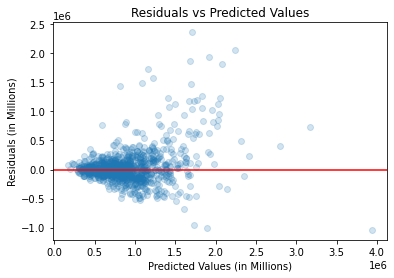

In [362]:
residual5 = y_test - y_pred5
plt.scatter(y_pred5, residual5, alpha=0.2)
plt.xlabel("Predicted Values (in Millions)")
plt.ylabel("Residuals (in Millions)")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


###### Model Evaluation

- This Support Vector Regressor Model represents a substantial regression compared to the other tuned models 
- With a mean absolute error of 175k, it is more in line with the un-tuned Decision Tree Regressor
- The model has a mean absolute error percentage of 17.30%, representing a very slight improvement from the Untuned Decision Tree Regressor
- The model has a median absolute error percentage of 12.71%, representing a slight regression from the Untuned Decision Tree Regressor
- Very poor model performance, and therefore, will be excluded from the Stacking Classifier Below

###### Model #5: Stacking Classifier: Random Forest and XGBoost with Linear Regression Metamodel

In [299]:
estimators = [
    ('xgbr',best_model1), 
     ('rfr', best_model),
]

In [310]:
from sklearn.linear_model import LinearRegression
stack = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression())

In [311]:
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('xgbr',
                               Pipeline(steps=[('preprocessing',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer()),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 Index(['Age', 'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET',
       'LOT SIZE'],
      dtype='object')),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('onehot',
                                                                                                  OneHotEncoder(drop='first'))]),
                                                                                 Index(['SALE TYP...
                                                                                 'passthrough',
                                                                                 Index(['12_bath', '175_bath', '1_bath', '1_bedroom', '1_car', '2_bath',
       '2_bed', '2_bedroom', '2_car', '2nd_floor',
       ...
       'window', 'wonderful', 'wood_burn', 'wood_floor', 'work', 'work_home',
       'yard', 'year', 'year_round', 'yet'],
      dtype='object', length=663))])),
                                               ('regressor',
                                                RandomForestRegressor(n_estimators=300,
                                                                      random_state=42))]))],
                  final_estimator=LinearRegression())

###### Predict on Test 

In [312]:
ypred6 = stack.predict(X_test)

###### Model Evaluation

In [313]:
mae6 = mean_absolute_error(y_test, ypred6)
mse6 = mean_squared_error(y_test, ypred6)
r26= r2_score(y_test, ypred6)
print(f"Mean Absolute Error: {mae6}")
print(f"Mean Squared Error: {mse6}")
print(f"r2: {r26}")

Mean Absolute Error: 118912.01031772971
Mean Squared Error: 39098037781.0808
r2: 0.8703407034597063


###### Getting Mean Absolute Error Percentage

In [327]:
y_testnp4, y_prednp4 = np.array(y_test), np.array(ypred6)

In [331]:
mape5 = np.mean(np.abs((y_testnp4 - y_prednp4) / y_testnp4)) * 100

In [332]:
print(f"Mean Absolute Percentage Error%: {mape5:.2f}%")

Mean Absolute Percentage Error%: 12.55%


In [335]:
absolute_percentage_errors5 = np.abs((y_test - ypred6) / y_test) * 100

In [336]:
median_percentage_error5 = np.median(absolute_percentage_errors5)

In [337]:
print(f"Median Absolute Percentage Error: {median_percentage_error5:.2f}%")

Median Absolute Percentage Error: 8.26%


###### Model Prediction Values vs. Ground Truth Values

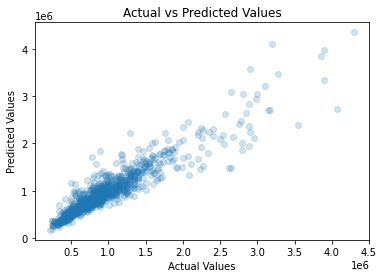

In [354]:
plt.scatter(y_test, ypred6, alpha=0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.show()

###### Residuals vs. Predicted Values

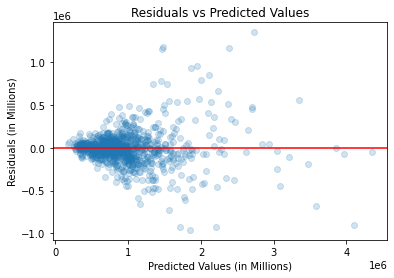

In [359]:
residual6 = y_test - ypred6
plt.scatter(ypred6, residual6, alpha=0.2)
plt.xlabel("Predicted Values (in Millions)")
plt.ylabel("Residuals (in Millions)")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


###### Model Evaluation

- The Stacking Regressor Model performs in-line with the hyperparameter tuned XGBoost model.
- With a mean absolute error of 118k, it represents a slight but negligible improvement over the XGBoost
- The model has a mean absolute error percentage of just 12.55%, representing a miniscule improvement from the XBoost Regressor
- The model has a median absolute error percentage of just 8.25%, representing a miniscule regression from the XGBoost Regressor
- The Stacking Classifier, though performing in line with the XGBoost model, sacrifices model interpretability and therefore the XGBoost Regressor 
is selected as the superior model among all permutations tested.

### Overall Conclusion:
- The XGBoost Hyper-parameter tuned model performed the best while still providing some level of interpretability, whereas, the stacked regressor performed similarly provides no model intepretability
- The Project best model, as expected, significantly underperformed industry standard models with access to much larger reservoirs of information as well as historic pricing and 100's of millions of sales.
- The Project best model acheived a median absolute error percentage of 8.19% 
- Zillow's Zestimate, on the other hand, acheives significantly better performance of 2.11% in the Seattle Metro. 

### Next Steps and Possible Improvements 
- A larger dataset, including more historic sales, would likely have increased the project best model performance. 
- Additionally, Scraping additional features from the Redfin website may have provided more numeric and categorical features to improve model performance
- Topic Modeling, Such as Latent Dichlemet Analysis, could provide more salient NLP features and improved model performance. 
- Expirimenting with NLP methods beyond a simple bigram Bag-of-Words approach might yield more precise predictions